# Análise de Cluster

MBA em Data Science e Analytics USP ESALQ
Prof. Dr. Wilson Tarantin Junior

-- coding: utf-8 --

In [1]:
# Instalando os pacotes.

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scipy
!pip install scikit-learn
!pip install pingouin

In [2]:
# Importando os pacotes.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 
import plotly.io as pio

In [3]:
# Importando os dados.

url = 'https://github.com/filipecarbonera/MBA_USP_Data_Science_Analytics/raw/main/Clustering/regional_varejista.xlsx'
# Fonte: Fávero & Belfiore (2024, Capítulo 9)

varejista = pd.read_excel(url)
varejista

,loja,regional,atendimento,sortimento,organização
0,1,Regional 3,6,6,4
1,2,Regional 3,14,2,4
2,3,Regional 3,8,4,6
3,4,Regional 3,4,4,4
4,5,Regional 3,6,6,6
5,6,Regional 2,38,38,100
6,7,Regional 1,40,78,38
7,8,Regional 3,6,4,4
8,9,Regional 3,4,4,6
9,10,Regional 3,6,6,2


In [4]:
# Visualizando os dados.
varejista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loja         18 non-null     int64 
 1   regional     18 non-null     object
 2   atendimento  18 non-null     int64 
 3   sortimento   18 non-null     int64 
 4   organização  18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes


In [6]:
# Estatísticas descritivas das variáveis.

varejista[['atendimento','sortimento', 'organização']].describe()

,atendimento,sortimento,organização
count,18.000000,18.000000,18.000000
mean,28.111111,27.888889,33.111111
std,27.003026,30.497616,37.247801
min,2.000000,2.000000,2.000000
25%,6.000000,4.000000,4.000000
50%,11.000000,6.000000,6.000000
75%,52.000000,51.500000,55.000000
max,78.000000,86.000000,100.000000


Neste caso não faremos a padronização pois as variáveis estão na mesma escala.

In [8]:
# Retirando todos os dados que não são numéricos do dataset.
varejo = varejista.drop(columns=['loja','regional'])

varejo.head()

,atendimento,sortimento,organização
0,6,6,4
1,14,2,4
2,8,4,6
3,4,4,4
4,6,6,6


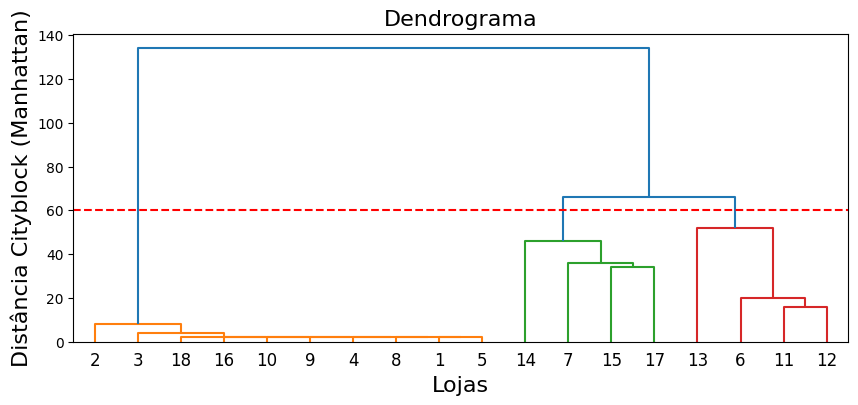

In [14]:
# Cluster Hierárquico Aglomerativo: single linkage + distância cityblock.

# Gerando o dendrograma.
plt.figure(figsize=(10,4))
dend_sing = sch.linkage(varejo, method = 'single', metric = 'cityblock')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 60, labels = list(varejista.loja))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Cityblock (Manhattan)', fontsize=16)
plt.axhline(y = 60, color = 'red', linestyle = '--')
plt.show()


In [17]:
# Criando a variável que indica os clusters no banco de dados.
cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'cityblock', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(varejo)
varejista['cluster_single'] = indica_cluster_sing
varejista['cluster_single'] = varejista['cluster_single'].astype('category')

varejista.head()

,loja,regional,atendimento,sortimento,organização,cluster_single
0,1,Regional 3,6,6,4,1
1,2,Regional 3,14,2,4,1
2,3,Regional 3,8,4,6,1
3,4,Regional 3,4,4,4,1
4,5,Regional 3,6,6,6,1


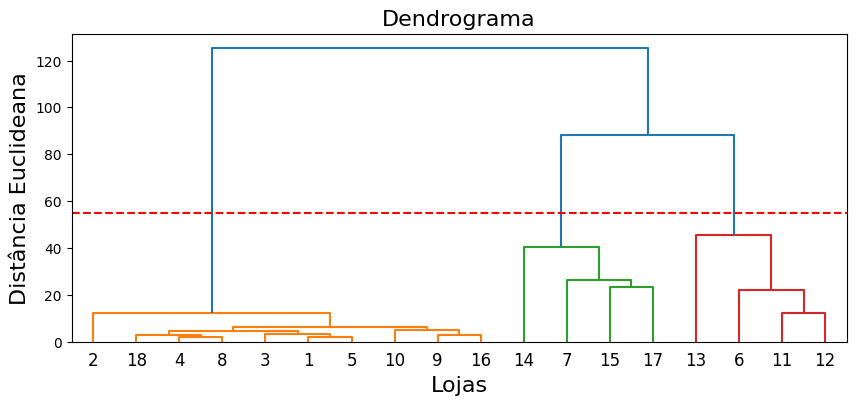

In [18]:
# Cluster Hierárquico Aglomerativo: complete linkage + distância euclidiana.

# Gerando o dendrograma.
plt.figure(figsize=(10,4))
dend_sing_euc = sch.linkage(varejo, method = 'complete', metric = 'euclidean')
dendrogram_euc = sch.dendrogram(dend_sing_euc, color_threshold = 55, labels = list(varejista.loja))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Euclideana', fontsize=16)
plt.axhline(y = 55, color = 'red', linestyle = '--')
plt.show()

# Criando a variável que indica os clusters no banco de dados

cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(varejo)
varejista['cluster_complete'] = indica_cluster_comp
varejista['cluster_complete'] = varejista['cluster_complete'].astype('category')

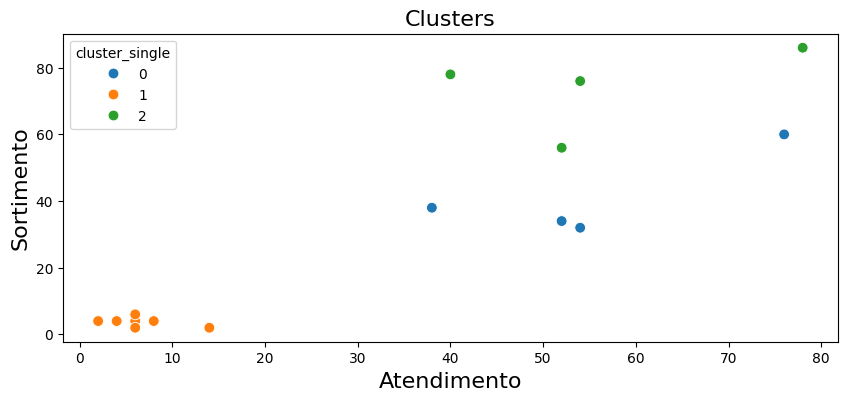

In [21]:
# Plotando as observações e seus clusters (single + cityblock).

plt.figure(figsize=(10,4))
fig = sns.scatterplot(x='atendimento', y='sortimento', s=60, data=varejista, hue='cluster_single')
plt.title('Clusters', fontsize=16)
plt.xlabel('Atendimento', fontsize=16)
plt.ylabel('Sortimento', fontsize=16)
plt.show()

In [23]:
# Método K-Means.

# Considerando que identificamos 3 possíveis clusters na análise hierárquica.
kmeans_varejista = KMeans(n_clusters=3, init='random', random_state=100).fit(varejo)

In [ ]:
# Criando a variável que indica os clusters no banco de dado.

kmeans_clusters = kmeans_varejista.labels_
varejista['cluster_kmeans'] = kmeans_clusters
varejista['cluster_kmeans'] = varejista['cluster_kmeans'].astype('category')

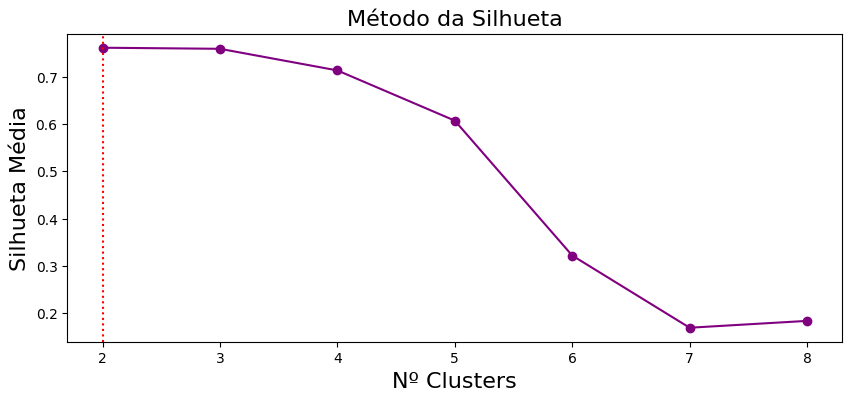

In [25]:
# Método da silhueta para identificação do nº de clusters.

silhueta = []
I = range(2,9)
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(varejo)
    silhueta.append(silhouette_score(varejo, kmeansSil.labels_))

plt.figure(figsize=(10,4))
plt.plot(range(2, 9), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

# A silhueta média é praticamente igual em 2 ou 3 clusters!
# Para aprimorar a interpretação, vamos manter 3 clusters!

In [26]:
# Coordenadas dos centroides dos clusters finais.
cent_finais = pd.DataFrame(kmeans_varejista.cluster_centers_)
cent_finais.columns = varejo.columns
cent_finais.index.name = 'cluster'
cent_finais

,atendimento,sortimento,organização
cluster,,,
0,6.2,4.2,4.4
1,56.0,74.0,45.0
2,55.0,41.0,93.0


In [27]:
# Plotando as observações e seus centroides dos clusters.
plt.figure(figsize=(10,4))
sns.scatterplot(x='atendimento', y='sortimento', data=varejista, hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(x='atendimento', y='sortimento', data=cent_finais, s=40, c='red', label='Centroides', marker="X")
plt.title('Clusters e centroides', fontsize=16)
plt.xlabel('Atendimento', fontsize=16)
plt.ylabel('Sortimento', fontsize=16)
plt.legend()
plt.show()

ValueError: Could not interpret value `cluster_kmeans` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x400 with 0 Axes>

In [28]:
#%% Estatística F das variáveis

# Atendimento
pg.anova(dv='atendimento', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

# Sortimento
pg.anova(dv='sortimento', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

# Organização
pg.anova(dv='organização', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

KeyError: "['cluster_kmeans'] not in index"